<a href="https://colab.research.google.com/github/khangtruong2252314/ML-BackProg/blob/main/ML_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Login

In [ ]:
from huggingface_hub import login
from google.colab import userdata

mail = userdata.get('MAIL')
user = userdata.get('USER')
token = userdata.get('GIT_TOKEN')
!git config --global user.email {mail}
!git config --global user.name {user}

SecretNotFoundError: Secret MAIL does not exist.

In [1]:
!wget https://raw.githubusercontent.com/khangtruong2252314/ML-BackProg/refs/heads/main/README.md -O readme.md
!cat readme.md

--2025-05-13 03:03:14--  https://raw.githubusercontent.com/khangtruong2252314/ML-BackProg/refs/heads/main/README.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3720 (3.6K) [text/plain]
Saving to: ‘readme.md’

readme.md           100%[===================>]   3.63K  --.-KB/s    in 0s      

2025-05-13 03:03:15 (56.1 MB/s) - ‘readme.md’ saved [3720/3720]

# ML-BackProg

This project explores various Machine Learning models for sentiment classification on the IMDB dataset. It includes implementations of Decision Trees, Artificial Neural Networks (ANNs) Naive Bayes with Genetic Algorithm and Graphical Models (Bayesian Networks, HMM).

## Dataset :bar_chart:

The project utilizes the [IMDB dataset](https://huggingface.co/datasets/stanfordnlp/imdb) from Hugging

### Git clone

In [ ]:
!git clone https://{token}@github.com/khangtruong2252314/ML-BackProg

Cloning into 'ML-BackProg'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 235 (delta 7), reused 17 (delta 5), pack-reused 214 (from 1)
Receiving objects: 100% (235/235), 15.23 MiB | 8.68 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [ ]:
%cd /content/ML-BackProg

/content/ML-BackProg


In [ ]:
!pip list | grep sklearn
!pip list | grep numpy

sklearn-compat                        0.1.3
sklearn-pandas                        2.2.0
numpy                                 2.0.2


## Load dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
!ls {path}/chest_xray/chest_xray

test  train  val


In [ ]:
!echo "Train - Test count"
!ls {path}/chest_xray/chest_xray/train/PNEUMONIA/ | wc -l
!ls {path}/chest_xray/chest_xray/train/NORMAL/ | wc -l

Train - Test count
3875
1341


## Run
Models includes:
1.   SVM (different kernel functions, soft-hard margin)
2.   Dimension reduction (PCA, LDA)
3.   Bagging - Boosting
4.   Discriminator (Logistics, Entropy (whut is this), CRF)


### Utility

In [ ]:
from sklearn.metrics import classification_report
import joblib

In [ ]:
def dump_model(model, name, base_path='ml-course/models/trained'):
    model_path = os.path.join(base_path, f'{name}.joblib')
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    path = model_path
    joblib.dump(model, path)

In [ ]:
def flatten_image(img, label):
    return tf.reshape(img, [tf.shape(img)[0], 256 * 256 * 3]), tf.argmax(label, axis=-1, output_type=tf.int32)

In [ ]:
import tensorflow as tf
import os
import numpy as np

train_set, test_set, val_set = (
    tf.keras.utils.image_dataset_from_directory(
        os.path.join(path, 'chest_xray/chest_xray', subset),
        labels='inferred',
        label_mode='categorical',
        image_size=(256, 256),
        batch_size=10000,
        shuffle=True,
        seed=42
) for subset in ['train', 'val', 'test'])

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
X_train, y_train = next(iter(train_set.map(flatten_image)))
X_test, y_test = next(iter(test_set.map(flatten_image)))
X_val, y_val = next(iter(val_set.map(flatten_image)))

In [ ]:
X_train = X_train.numpy()  # Convert to NumPy array
X_test = X_test.numpy()
X_val = X_val.numpy()

In [ ]:
y_train = np.reshape(np.array(list(train_set.map(lambda x, y: tf.argmax(y, axis=-1)))), [-1])
y_test = np.reshape(np.array(list(test_set.map(lambda x, y: tf.argmax(y, axis=-1)))), [-1])
y_val = np.reshape(np.array(list(val_set.map(lambda x, y: tf.argmax(y, axis=-1)))), [-1])

In [ ]:
import tensorflow as tf
import os
import numpy as np

train_set, test_set, val_set = (
    tf.keras.utils.image_dataset_from_directory(
        os.path.join(path, 'chest_xray/chest_xray', subset),
        labels='inferred',
        label_mode='categorical',
        image_size=(256, 256),
        batch_size=8,
        shuffle=True,
        seed=42
) for subset in ['train', 'val', 'test'])

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
all_classes = train_set.class_names
all_classes

['NORMAL', 'PNEUMONIA']

In [ ]:
X_train.shape
y_train.shape

In [ ]:
train_set.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))

### SVM

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
svm_online = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, learning_rate='adaptive', eta0=0.01)

In [ ]:
import numpy as np

for X_train, y_train in train_set.map(flatten_image):
    for i in range(len(X_train)):
        svm_online.partial_fit(np.array([X_train[i]]), np.array([y_train[i]]), classes=[0, 1])

In [ ]:
X_test, y_test = next(iter(test_set.map(flatten_image)))
y_pred = svm_online.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dump_model(svm_online, name='svm')

### PCA - LDA

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
class PCA(tf.keras.Model):
    def __init__(self, num_feat=2**16 * 3, num_components=4):
        super(PCA, self).__init__()
        self.pca = tf.keras.layers.Dense(num_components)
        self.out = tf.keras.layers.Dense(num_feat)
        self.num_components = num_components
        self(tf.zeros([1, num_feat]))

    def call(self, inputs, training=True):
        if training:
            return self.out(self.pca(inputs))
        else:
            return self.pca(inputs)

    def train_step(self, data):
        x, _ = data
        with tf.GradientTape() as tape:
            x_pred = self.call(x, training=True)
            loss = tf.keras.losses.MSE(x, x_pred)
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        return dict(loss=loss)

    def predict_step(self, data):
        x, _ = data
        x_pred = self(x, training=False)
        return x_pred

    def transform(self, data):
        return self.predict(data)

In [ ]:
pca = PCA()
pca.compile(loss='mse')
pca.summary()
lda = LinearDiscriminantAnalysis()

Model: "pca_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (1, 4)                 │       786,436 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 196608)            │       983,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,769,476 (6.75 MB)

 Trainable params: 1,769,476 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pca.fit(train_set.map(flatten_image), epochs=5)
pca.save_weights('ml-course/models/trained/pca.weights.h5')

Epoch 1/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - loss: 9314.9688
Epoch 2/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - loss: 8370.2734
Epoch 3/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 8184.2695
Epoch 4/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 8479.4004
Epoch 5/5
652/652 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step - loss: 8593.4326


In [ ]:
pca.load_weights('ml-course/models/trained/pca.weights.h5')
x_train_pca = pca.transform(train_set.map(flatten_image))

  2/652 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


652/652 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step


In [ ]:
x_train_pca.shape

(5216, 4)

In [ ]:
y_train.shape

(5216,)

In [ ]:
lda.fit(x_train_pca, y_train)

LinearDiscriminantAnalysis()

In [ ]:
dump_model(lda, 'lda')

In [ ]:
print(classification_report(y_pred=lda.predict(pca.predict(test_set.map(flatten_image))), y_true=y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Bagging (Random forest) - Boosting

In [ ]:
#import part
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### Discrimination (CRF)

#### Image processing

In [ ]:
import tensorflow as tf
import os
import numpy as np

train_set, test_set, val_set = (
    tf.keras.utils.image_dataset_from_directory(
        os.path.join(path, 'chest_xray/chest_xray', subset),
        labels='inferred',
        label_mode='categorical',
        image_size=(256, 256),
        batch_size=128,
        shuffle=True,
        seed=42
) for subset in ['train', 'val', 'test'])

def flatten_image(img, label):
    return tf.reshape(img, [tf.shape(img)[0], 256 * 256 * 3]), tf.argmax(label, axis=-1, output_type=tf.int32)

X_train, y_train = next(iter(train_set.map(flatten_image)))
X_test, y_test = next(iter(test_set.map(flatten_image)))
X_val, y_val = next(iter(val_set.map(flatten_image)))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


#### Logistic Regression and Maximum Entropy

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on new data
predictions = model.predict(X_test)

#### CRF for sequence labeling

In [ ]:
!pip install sklearn-crfsuite

In [ ]:
import sklearn_crfsuite
from sklearn_crfsuite import CRF
from sklearn_crfsuite import metrics

X0_train, y0_train = X_train.numpy(), y_train.numpy()
X0_train = [[{"feature_{}".format(i): float(value)} for i, value in enumerate(sample)]for sample in X0_train]
y0_train = [[str(label)]*len(X0_train[0]) for label in y0_train]

X0_test, y0_test = X_test.numpy(), y_test.numpy()
X0_test = [[{"feature_{}".format(i): float(value)} for i, value in enumerate(sample)]for sample in X0_test]
y0_test = [[str(label)]*len(X0_test[0]) for label in y0_test]

crf = CRF(algorithm='lbfgs', max_iterations=100)
crf.fit(X0_train, y0_train)

CRF(algorithm='lbfgs', max_iterations=100)

In [ ]:
# Predict sequence labels
y_pred = crf.predict(X0_test)
labels = list(crf.classes_)
metrics.flat_f1_score(y0_test, y_pred, average='weighted', labels=labels)

print(metrics.flat_classification_report(y0_test, y_pred, labels=labels, digits=3))

              precision    recall  f1-score   support

           1      0.601     0.639     0.619    983040
           0      0.615     0.576     0.594    983040

    accuracy                          0.607   1966080
   macro avg      0.608     0.607     0.607   1966080
weighted avg      0.608     0.607     0.607   1966080



#### Report

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.64      0.88      0.74         8

    accuracy                           0.69        16
   macro avg       0.72      0.69      0.68        16
weighted avg       0.72      0.69      0.68        16

Accuracy: 0.6875


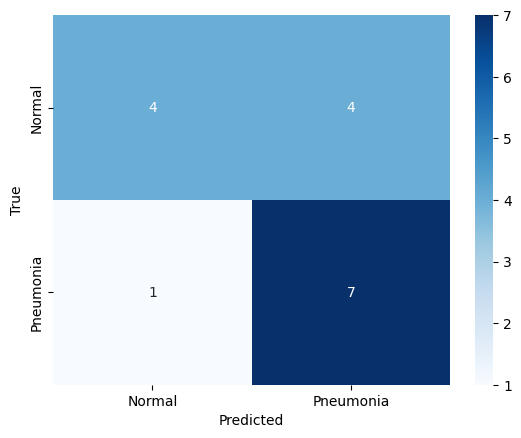

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on test data
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
dump_model(model, 'discriminative')

## Save something

In [ ]:
!git add -A .
!git commit -m "LDA"
!git push

[main 6ad7f7a] LDA
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 ml-course/models/trained/lda.joblib
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 1.12 KiB | 1.12 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/khangtruong2252314/ML-BackProg
   8e0459c..6ad7f7a  main -> main
